In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
d=df[['PassengerId','Pclass','Age','SibSp','Parch','Survived']]
d=d.dropna()
d.shape

(714, 6)

In [4]:
#drop survived column from selected column
x=d.drop('Survived',axis=1)
x

,PassengerId,Pclass,Age,SibSp,Parch
0,1,3,22.0,1,0
1,2,1,38.0,1,0
2,3,3,26.0,0,0
3,4,1,35.0,1,0
4,5,3,35.0,0,0
...,...,...,...,...,...
885,886,3,39.0,0,5
886,887,2,27.0,0,0
887,888,1,19.0,0,0
889,890,1,26.0,0,0


In [5]:
#gives only survived column
y=d['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
#x_train is all instance with attributes,y_train is the label of each instances.y_traiin is either 0 or 1.
#train_test_split is for splitting a single dataset for two different purposes:training and testing
#the testing is a subset is for building your model.
#the training set is apply to train or fit your model using linear regression, logistic regression.
#x is two dimensional array with input and y is one dimensional array with outputs.
#x_train:training part of first sequence.x_test:testing part of first sequence.
#y_train:training part of second sequence.Y_test:testing part of second sequence.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=34)
x_train

,PassengerId,Pclass,Age,SibSp,Parch
115,116,3,21.0,0,0
167,168,3,45.0,1,4
37,38,3,21.0,0,0
293,294,3,24.0,0,0
307,308,1,17.0,1,0
...,...,...,...,...,...
402,403,3,21.0,1,0
110,111,1,47.0,0,0
621,622,1,42.0,1,0
151,152,1,22.0,1,0


In [7]:
model=DecisionTreeClassifier(max_depth=3,random_state=0)
model.fit(x_train,y_train)
print(model)
y_pred = model.predict(x_test)
y_pred

DecisionTreeClassifier(max_depth=3, random_state=0)


array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0], dtype=int64)

In [8]:
print(df)
print("")
model=DecisionTreeClassifier(max_depth=100,random_state=500,criterion='gini',splitter='best',max_features=None,
                            ccp_alpha=0.0,
                            min_impurity_decrease=0.0,
                            min_samples_leaf=1,
                            min_samples_split=2)
model.fit(x_train,y_train)
print(model)
y_pred = model.predict(x_test)
acc_dec_tree = round(model.score(x_train, y_train) * 100, 2)
model.score(x_train,y_train)
print(round(acc_dec_tree,2,),"%")

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['deck']=df['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else 'M')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,M
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,M
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


In [10]:
#the lambda function basically used to identify the name by first character
df['Ticket_enc']=df['Ticket'].apply(lambda s:s[0] if pd.notnull(s) else 'M')
df['Ticket_enc']=df['Ticket'].replace(['1','2','3','4','5','6','7','8'],'N')
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [11]:
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Fare_e']=le.fit_transform(df['Fare'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck,Ticket_enc,Fare_e
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M,A/5 21171,18
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,PC 17599,207
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,M,STON/O2. 3101282,41
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,113803,189
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,M,373450,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,M,211536,85
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,112053,153
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,M,W./C. 6607,131
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,111369,153


In [13]:
from sklearn.preprocessing import OneHotEncoder
x_enc=df.copy(True)
x_enc=pd.get_dummies(x_enc,columns=['Sex'])
x_enc

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck,Ticket_enc,Fare_e,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,M,A/5 21171,18,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,C,PC 17599,207,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,M,STON/O2. 3101282,41,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,C,113803,189,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,M,373450,43,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,M,211536,85,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,B,112053,153,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,M,W./C. 6607,131,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,C,111369,153,0,1


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Fare_encode']=le.fit_transform(df['Fare'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck,Ticket_enc,Fare_e,Fare_encode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M,A/5 21171,18,18
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,PC 17599,207,207
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,M,STON/O2. 3101282,41,41
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,113803,189,189
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,M,373450,43,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,M,211536,85,85
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,112053,153,153
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,M,W./C. 6607,131,131
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,111369,153,153


In [15]:
d=df[['PassengerId','Pclass','Age','SibSp','Parch','Survived','Fare_encode']]
d=d.dropna()
d.shape

(714, 7)

In [16]:
x=d.drop('Survived',axis=1)
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare_encode
0,1,3,22.0,1,0,18
1,2,1,38.0,1,0,207
2,3,3,26.0,0,0,41
3,4,1,35.0,1,0,189
4,5,3,35.0,0,0,43
...,...,...,...,...,...,...
885,886,3,39.0,0,5,151
886,887,2,27.0,0,0,85
887,888,1,19.0,0,0,153
889,890,1,26.0,0,0,153


In [17]:
y=d['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
#x_train is all instance with attributes,y_train is the label of each instances.y_traiin is either 0 or 1.
#train_test_split is for splitting a single dataset for two different purposes:training and testing
#the testing is a subset is for building your model.
#the training set is apply to train or fit your model using linear regression, logistic regression.
#x is two dimensional array with input and y is one dimensional array with outputs.
#x_train:training part of first sequence.x_test:testing part of first sequence.
#y_train:training part of second sequence.Y_test:testing part of second sequence.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)
y_train

746    0
378    0
129    0
664    1
238    0
      ..
92     0
134    0
337    1
548    0
130    0
Name: Survived, Length: 642, dtype: int64

In [19]:
model=DecisionTreeClassifier(max_depth=10,random_state=42,criterion='gini',splitter='best',max_features=None)
model.fit(x_train,y_train)
print(model)
y_pred = model.predict(x_train)
acc_dec_tree = round(model.score(x_train, y_train) * 100, 2)
model.score(x_train,y_train)
print(round(acc_dec_tree,2,),"%")

DecisionTreeClassifier(max_depth=10, random_state=42)
91.9 %


DecisionTreeClassifier(max_depth=10, random_state=42)

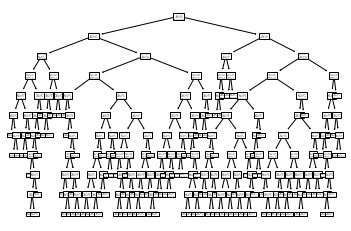

In [20]:
from sklearn import tree
tree.plot_tree(model)
model